In [28]:
%matplotlib inline

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from HeaderP import *
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)

def fitpoints(x,y):
    z = np.polyfit(x,y,1)
    p = np.poly1d(z)
    return p




In [29]:
from TheCannon import apogee
tr_ID, wl, tr_flux, tr_ivar = apogee.load_spectra("example_DR10/Data")
tr_label = apogee.load_labels("example_DR10/reference_labels.csv")

Loading spectra from directory example_DR10/Data
Spectra loaded
Loading reference labels from file example_DR10/reference_labels.csv


In [30]:
test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar

In [32]:
np.save('2Mids.npy',test_ID)

In [6]:
from TheCannon import dataset
ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, test_ID, test_flux, test_ivar,tr_label)

Loading dataset
This may take a while...


In [7]:
ds.set_label_names(['Teff', 'logg', '[Fe/H]'])

Diagnostic for SNRs of reference and survey objects


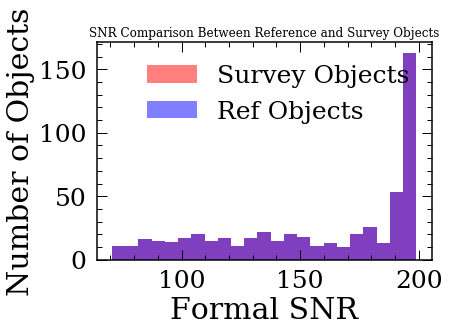

In [8]:
fig = ds.diagnostics_SNR()

Plotting every label against every other


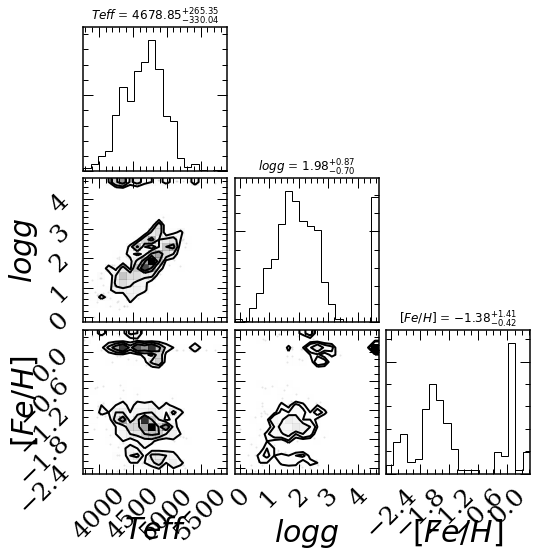

In [9]:
fig = ds.diagnostics_ref_labels()

In [10]:
ds.ranges = [[371,3192], [3697,5997], [6461,8255]]

In [11]:
pseudo_tr_flux, pseudo_tr_ivar = ds.continuum_normalize_training_q(q=0.90, delta_lambda=50)

  0%|          | 0/548 [00:00<?, ?it/s]

Continuum normalizing the tr set using running quantile...
##########################################################
@Bo Zhang: you will use only 1 process ...
           i.e., the original TheCannon version
##########################################################
contnorm.py: continuum norm using running quantile
Taking spectra in 3 chunks


100%|██████████| 548/548 [00:46<00:00, 11.85it/s]


In [12]:
contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)

Finding continuum pixels...
taking spectra in 3 regions
Target frac: 0.07
202 out of 2821 pixels identified as continuum
Cuts: f_cut 0.006000000000000003, sig_cut 0.006000000000000003
Target frac: 0.07
162 out of 2300 pixels identified as continuum
Cuts: f_cut 0.006900000000000005, sig_cut 0.006900000000000005
Target frac: 0.07
127 out of 1794 pixels identified as continuum
Cuts: f_cut 0.007000000000000005, sig_cut 0.007000000000000005
491 pixels returned as continuum


In [13]:
ds.ranges = [[371,3192], [3697,5500], [5500,5997], [6461,8255]]
contmask = ds.make_contmask(pseudo_tr_flux, pseudo_tr_ivar, frac=0.07)

Finding continuum pixels...
taking spectra in 4 regions
Target frac: 0.07
202 out of 2821 pixels identified as continuum
Cuts: f_cut 0.006000000000000003, sig_cut 0.006000000000000003
Target frac: 0.07
127 out of 1803 pixels identified as continuum
Cuts: f_cut 0.006000000000000003, sig_cut 0.006000000000000003
Target frac: 0.07
36 out of 497 pixels identified as continuum
Cuts: f_cut 0.010199999999999994, sig_cut 0.010199999999999994
Target frac: 0.07
127 out of 1794 pixels identified as continuum
Cuts: f_cut 0.007000000000000005, sig_cut 0.007000000000000005
492 pixels returned as continuum


In [14]:
ds.set_continuum(contmask)

In [15]:
cont = ds.fit_continuum(3, "sinusoid")

Fitting Continuum...
Fitting Continuum in 4 Regions...


/Users/lucy/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [16]:
norm_tr_flux, norm_tr_ivar, norm_test_flux, norm_test_ivar = ds.continuum_normalize(cont)

taking spectra in 4 regions


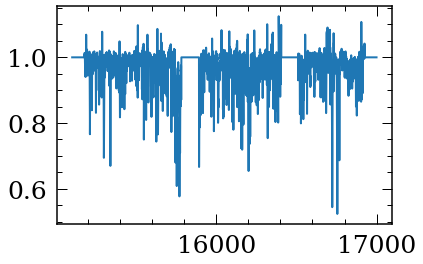

In [17]:
plt.plot(wl, norm_tr_flux[10,:])

In [18]:
ds.tr_flux = norm_tr_flux
ds.tr_ivar = norm_tr_ivar
ds.test_flux = norm_test_flux
ds.test_ivar = norm_test_ivar

In [19]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x134f527b8> <TheCannon.dataset.Dataset object at 0x1340a54a8>
Done training model. 


In [20]:
md.diagnostics_contpix(ds)


Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_0.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_1.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_2.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_3.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_4.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_5.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_6.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_7.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_8.png
Diagnostic plot: fitted 0th order spec w/ cont pix
Saved as baseline_spec_with_cont_pix_9.png


Diagnostic plot: leading coeffs and scatters across wavelength.


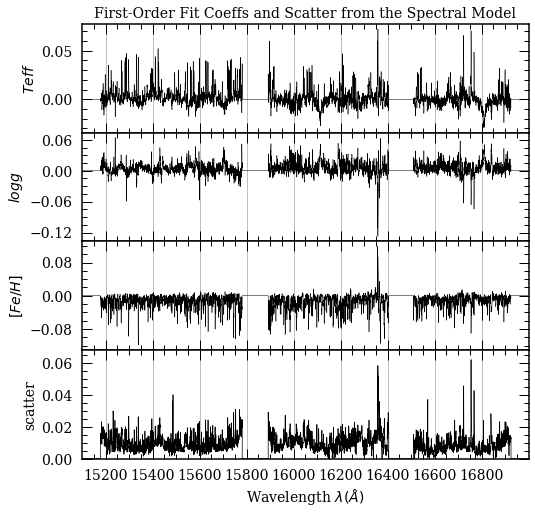

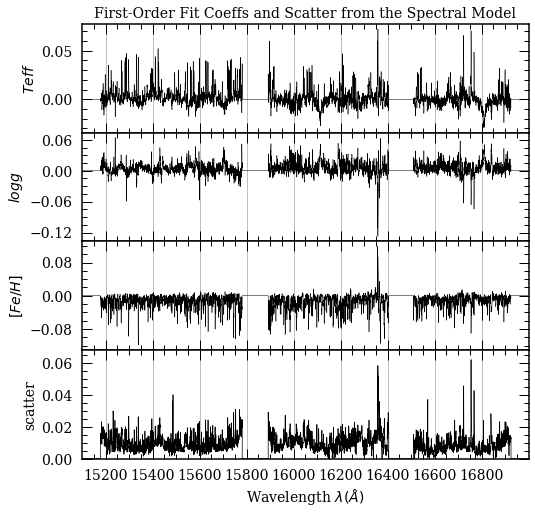

In [21]:
md.diagnostics_leading_coeffs(ds)


In [22]:
md.diagnostics_plot_chisq(ds)

Diagnostic plot: histogram of the red chi squareds of the fit
Saved as modelfit_chisqs.png


In [23]:
label_errs = md.infer_labels(ds)

Inferring Labels


In [24]:
test_labels = ds.test_label_vals

Reference label Teff
flagged 28 stars beyond 2-sig of ref labels
Saved list flagged_stars_0.txt
Reference label logg
flagged 67 stars beyond 2-sig of ref labels
Saved list flagged_stars_1.txt
Reference label [Fe/H]
flagged 0 stars beyond 2-sig of ref labels
Saved list flagged_stars_2.txt
Plotting every label against every other


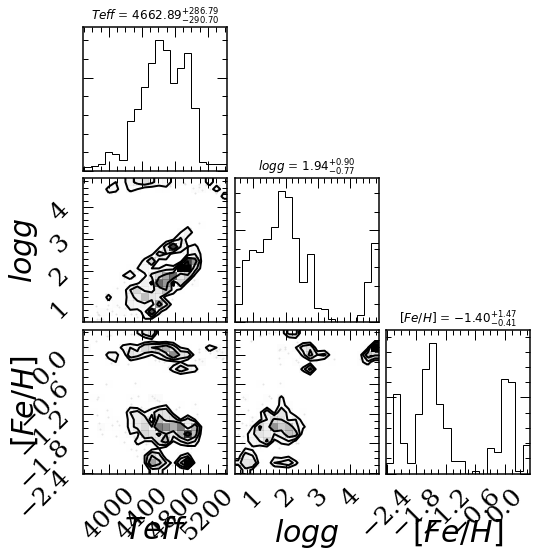

In [25]:
ds.diagnostics_test_step_flagstars()
ds.diagnostics_survey_labels()

In [26]:
import matplotlib.gridspec as gridspec
def diagnostics_1to1(ds, figname="1to1_label"):
        """ Plots survey labels vs. training labels, color-coded by survey SNR """
        label_names = ds.get_plotting_labels()
        nlabels = len(label_names)
        reference_labels = ds.test_label
        test_labels = ds.test_label_vals

        for i in range(nlabels):
            snr = ds.test_SNR
            name = label_names[i]
            orig = reference_labels[:,i]
            cannon = test_labels[:,i]
            
            m1=cannon>-500
            m2=orig>-500
            m=m1&m2
            
            orig, cannon, snr=orig[m],cannon[m],snr[m]
            
            # calculate bias and scatter
            scatter = np.round(np.std(orig-cannon),5)
            bias  = np.round(np.mean(orig-cannon),5)

            low = np.minimum(min(orig), min(cannon))
            high = np.maximum(max(orig), max(cannon))

            fig = plt.figure(figsize=(10,6))
            gs = gridspec.GridSpec(1,2,width_ratios=[2,1], wspace=0.3)
            ax1 = plt.subplot(gs[0])
            ax2 = plt.subplot(gs[1])
            ax1.plot([low, high], [low, high], 'k-', linewidth=2.0, label="x=y")
            ax1.set_xlim(low, high)
            ax1.set_ylim(low, high)
            ax1.legend(fontsize=14, loc='lower right')

            pl = ax1.scatter(orig, cannon, marker='x', c=snr,
                    vmin=50, vmax=200, alpha=0.7)
            cb = plt.colorbar(pl, ax=ax1, orientation='horizontal')
            cb.set_label('SNR from Test Set', fontsize=12)
            textstr = 'Scatter: %s \nBias: %s' %(scatter, bias)
            ax1.text(0.05, 0.95, textstr, transform=ax1.transAxes,
                    fontsize=14, verticalalignment='top')
            ax1.tick_params(axis='x', labelsize=14)
            ax1.tick_params(axis='y', labelsize=14)
            ax1.set_xlabel("Reference Value", fontsize=14)
            ax1.set_ylabel("Cannon Test Value", fontsize=14)
            ax1.set_title("1-1 Plot of Label " + r"$%s$" % name)
            diff = cannon-orig
            npoints = len(diff)
            mu = np.mean(diff)
            sig = np.std(diff)
            #ax2.hist(diff, orientation='horizontal')
            ax2.hist(diff, range=[-3*sig,3*sig], color='k', bins=int(np.sqrt(npoints)),
                    orientation='horizontal', alpha=0.3, histtype='stepfilled')
            ax2.tick_params(axis='x', labelsize=14)
            ax2.tick_params(axis='y', labelsize=14)
            ax2.set_xlabel("Count", fontsize=14)
            ax2.set_ylabel("Difference", fontsize=14)
            ax2.axhline(y=0, c='k', lw=3, label='Difference=0')
            ax2.set_title("Training Versus Test Labels for $%s$" %name,
                    fontsize=14)
            ax2.legend(fontsize=14)
            figname_full = "%s_%s.png" %(figname, i)
            if i==3:
                return orig, cannon



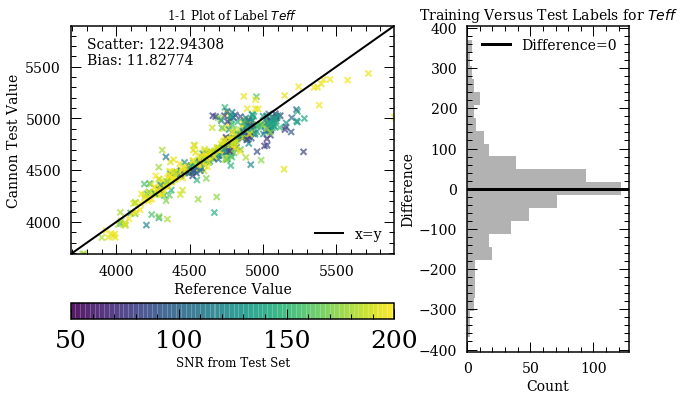

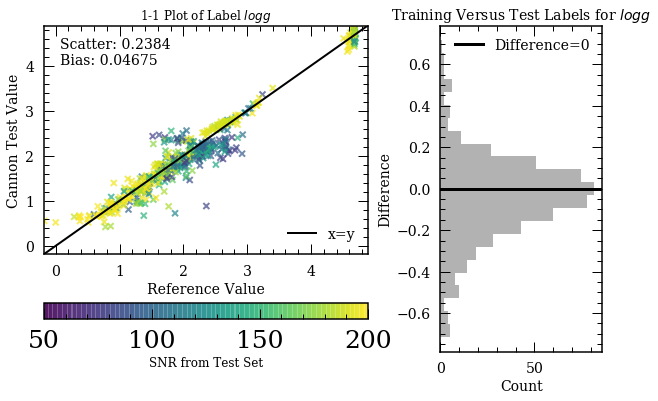

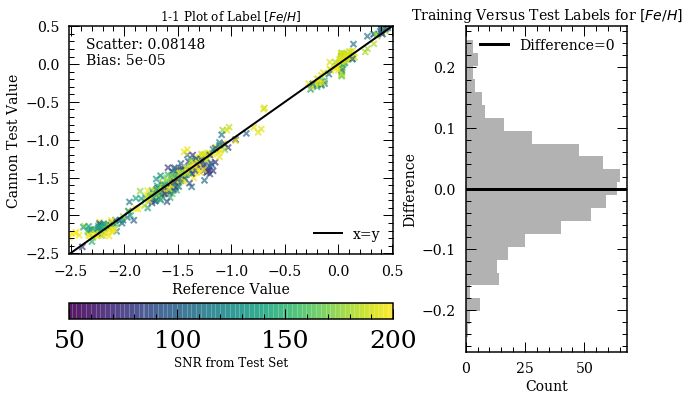

In [27]:
diagnostics_1to1(ds)

# Test on DR16 stars

In [ ]:
df_apogee=pd.read_pickle('/Users/lucy/Desktop/ASTR/Columbia/GalacticArch/APOGEE.pkl')

In [38]:
df_CM=df_apogee.loc[df_apogee['APOGEE_ID'].isin(tr_ID)].drop_duplicates(subset='APOGEE_ID').reset_index(drop=True)
df_CM

,APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,TELESCOPE,LOCATION_ID,FIELD,J,J_ERR,...,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_RP_MEAN_MAG,GAIA_RADIAL_VELOCITY,GAIA_RADIAL_VELOCITY_ERROR,GAIA_R_EST,GAIA_R_LO,GAIA_R_HI,TEFF_SPEC,LOGG_SPEC
0,apogee.apo25m.s.stars.N188-RV.2M00283971+8530377,apo25m.5199.N188-RV.2M00283971+8530377,apogee.apo25m.s.r12-l33.N188-RV.2M00283971+853...,apStar-r12-2M00283971+8530377.fits,2M00283971+8530377,apo25m,5199,N188-RV,12.221,0.029,...,13.859120,14.436117,13.153553,-9999.000000,-9999.000000,1656.519492,1612.069162,1703.439054,4803.500000,3.3690
1,apogee.apo25m.s.stars.N188-RV.2M00320079+8511465,apo25m.5199.N188-RV.2M00320079+8511465,apogee.apo25m.s.r12-l33.N188-RV.2M00320079+851...,apStar-r12-2M00320079+8511465.fits,2M00320079+8511465,apo25m,5199,N188-RV,10.451,0.027,...,12.255204,12.920858,11.496776,-41.670900,0.915354,1818.806860,1756.031464,1886.132964,4435.700195,2.6602
2,apogee.apo25m.s.stars.N188-RV.2M00454489+8504180,apo25m.5199.N188-RV.2M00454489+8504180,apogee.apo25m.s.r12-l33.N188-RV.2M00454489+850...,apStar-r12-2M00454489+8504180.fits,2M00454489+8504180,apo25m,5199,N188-RV,13.038,0.029,...,14.544093,15.086448,13.868540,-9999.000000,-9999.000000,1743.701622,1675.782001,1817.225944,4971.399902,3.6193
3,apogee.apo25m.s.stars.N188-RV.2M00463920+8523336,apo25m.5199.N188-RV.2M00463920+8523336,apogee.apo25m.s.r12-l33.N188-RV.2M00463920+852...,apStar-r12-2M00463920+8523336.fits,2M00463920+8523336,apo25m,5199,N188-RV,9.292,0.029,...,11.133034,11.847513,10.342466,-40.781196,1.345619,1782.282862,1710.045260,1860.740540,4309.200195,2.3278
4,apogee.apo25m.s.stars.N188-RV.2M00533497+8511145,apo25m.5199.N188-RV.2M00533497+8511145,apogee.apo25m.s.r12-l33.N188-RV.2M00533497+851...,apStar-r12-2M00533497+8511145.fits,2M00533497+8511145,apo25m,5199,N188-RV,11.376,0.027,...,13.079805,13.695369,12.345929,-43.330004,1.088345,1905.871695,1860.046958,1953.964516,4649.600098,3.0194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,apogee.apo25m.s.stars.N7789.2M23565527+5638268,apo25m.4264.N7789.2M23565527+5638268,apogee.apo25m.s.r12-l33.N7789.2M23565527+5638268,apStar-r12-2M23565527+5638268.fits,2M23565527+5638268,apo25m,4264,N7789,10.413,0.021,...,12.166034,12.743944,11.434437,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,5008.000000,3.0586
494,apogee.apo25m.s.stars.N7789.2M23565751+5645272,apo25m.4264.N7789.2M23565751+5645272,apogee.apo25m.s.r12-l33.N7789.2M23565751+5645272,apStar-r12-2M23565751+5645272.fits,2M23565751+5645272,apo25m,4264,N7789,10.016,0.020,...,12.112664,12.906175,11.256982,-54.631079,0.402265,2214.003118,2075.489705,2371.769503,4531.200195,2.6121
495,apogee.apo25m.s.stars.N7789.2M23571400+5640586,apo25m.4264.N7789.2M23571400+5640586,apogee.apo25m.s.r12-l33.N7789.2M23571400+5640586,apStar-r12-2M23571400+5640586.fits,2M23571400+5640586,apo25m,4264,N7789,9.706,0.020,...,11.812320,12.605700,10.956246,-53.639857,0.502202,2240.034933,2071.451222,2437.494118,4472.399902,2.4873
496,apogee.apo25m.s.stars.N7789.2M23572242+5641459,apo25m.4264.N7789.2M23572242+5641459,apogee.apo25m.s.r12-l33.N7789.2M23572242+5641459,apStar-r12-2M23572242+5641459.fits,2M23572242+5641459,apo25m,4264,N7789,9.761,0.021,...,11.906205,12.710376,11.042970,-54.102878,1.805239,2242.384539,2067.593626,2448.341242,4476.799805,2.4673


In [39]:
len(tr_ID)

548

In [40]:
filenames=[]
fields=df_CM.FIELD
filename=df_CM.APOGEE_ID
for i in range(len(df_CM)):
    path='/moto/astro/projects/APOGEE_dr16/apo25m/'+str(fields[i])+'/aspcapStar-r12-'+str(filename[i])+'.fits'
    filenames.append(path)
df_CM['path']=filenames

In [41]:
df_CM['path']

0      /moto/astro/projects/APOGEE_dr16/apo25m/N188-R...
1      /moto/astro/projects/APOGEE_dr16/apo25m/N188-R...
2      /moto/astro/projects/APOGEE_dr16/apo25m/N188-R...
3      /moto/astro/projects/APOGEE_dr16/apo25m/N188-R...
4      /moto/astro/projects/APOGEE_dr16/apo25m/N188-R...
                             ...                        
493    /moto/astro/projects/APOGEE_dr16/apo25m/N7789/...
494    /moto/astro/projects/APOGEE_dr16/apo25m/N7789/...
495    /moto/astro/projects/APOGEE_dr16/apo25m/N7789/...
496    /moto/astro/projects/APOGEE_dr16/apo25m/N7789/...
497    /moto/astro/projects/APOGEE_dr16/apo25m/N7789/...
Name: path, Length: 498, dtype: object

In [42]:
df_CM.to_pickle('DR10Check.pkl')

In [43]:
import os
from astropy.io import fits as pyfits
def load_spectra(data_dir):
    """ Reads wavelength, flux, and flux uncertainty data from apogee fits files

    Parameters
    ----------
    data_dir: str
        Name of the directory containing all of the data files

    Returns
    -------
    wl: ndarray
        Rest-frame wavelength vector

    fluxes: ndarray
        Flux data values

    ivars: ndarray
        Inverse variance values corresponding to flux values
    """
    print("Loading spectra from directory %s" %data_dir)
    files = list(sorted([data_dir + "/" + filename
             for filename in os.listdir(data_dir) if filename.endswith('fits')]))
    nstars = len(files)  
    for jj, fits_file in enumerate(files):
        file_in = pyfits.open(fits_file)
        #print(file_in)
        flux = np.array(file_in[1].data)
        if jj == 0:
            npixels = len(flux)
            fluxes = np.zeros((nstars, npixels), dtype=float)
            ivars = np.zeros(fluxes.shape, dtype=float)
            start_wl = file_in[1].header['CRVAL1']
            diff_wl = file_in[1].header['CDELT1']
            val = diff_wl * (npixels) + start_wl
            wl_full_log = np.arange(start_wl,val, diff_wl)
            wl_full = [10 ** aval for aval in wl_full_log]
            wl = np.array(wl_full)
        flux_err = np.array((file_in[2].data))
        badpix = get_pixmask(flux, flux_err)
        ivar = np.zeros(npixels)
        ivar[~badpix] = 1. / flux_err[~badpix]**2
        fluxes[jj,:] = flux
        ivars[jj,:] = ivar
    # convert filenames to actual IDs
    names = np.array([f.split('r12-')[1].split('.fits')[0] for f in files])
    print("Spectra loaded")
    # make sure they are numpy arrays
    return np.array(names), np.array(wl), np.array(fluxes), np.array(ivars)

def get_pixmask(fluxes, flux_errs):
    """ Create and return a bad pixel mask for an APOGEE spectrum

    Bad pixels are defined as follows: fluxes or errors are not finite, or 
    reported errors are <= 0, or fluxes are 0

    Parameters
    ----------
    fluxes: ndarray
        Flux data values 

    flux_errs: ndarray
        Flux uncertainty data values 

    Returns
    -------
    mask: ndarray
        Bad pixel mask, value of True corresponds to bad pixels
    """
    bad_flux = np.logical_or(~np.isfinite(fluxes), fluxes == 0)
    bad_err = (~np.isfinite(flux_errs)) | (flux_errs <= 0)
    bad_pix = bad_err | bad_flux
    return bad_pix

In [44]:
tr_ID, wl, tr_flux, tr_ivar = load_spectra("DR10Check")


Loading spectra from directory DR10Check
Spectra loaded


In [51]:
labels=pd.read_csv('example_DR10/reference_labels.csv')

In [72]:
labels['2MASS']=['2M'+i.split('2M')[1].split('.')[0] for i in labels['ID']]

In [73]:
labels['2MASS']

0      2M17162228+4258036
1      2M17163427+4307363
2      2M17163577+4256392
3      2M17164330+4304161
4      2M17165035+4305531
              ...        
543    2M19210483+3741036
544    2M19210629+3744596
545    2M19211007+3750008
546    2M19211606+3746462
547    2M19213390+3750202
Name: 2MASS, Length: 548, dtype: object

In [74]:
tr_label=np.zeros((498,3))
for i in range(498):
    tr_label[i,:]=labels.loc[labels['2MASS']==tr_ID[i]][['Teff','logg','[M/H]']].values

       Teff  logg  [M/H]
351  5093.7  3.06  -0.84


In [76]:
test_ID = tr_ID
test_flux = tr_flux
test_ivar = tr_ivar

In [77]:
from TheCannon import dataset
ds = dataset.Dataset(wl, tr_ID, tr_flux, tr_ivar, tr_label, test_ID, test_flux, test_ivar,tr_label)


Loading dataset
This may take a while...


In [78]:
ds.set_label_names(['Teff', 'logg', '[Fe/H]'])

Diagnostic for SNRs of reference and survey objects


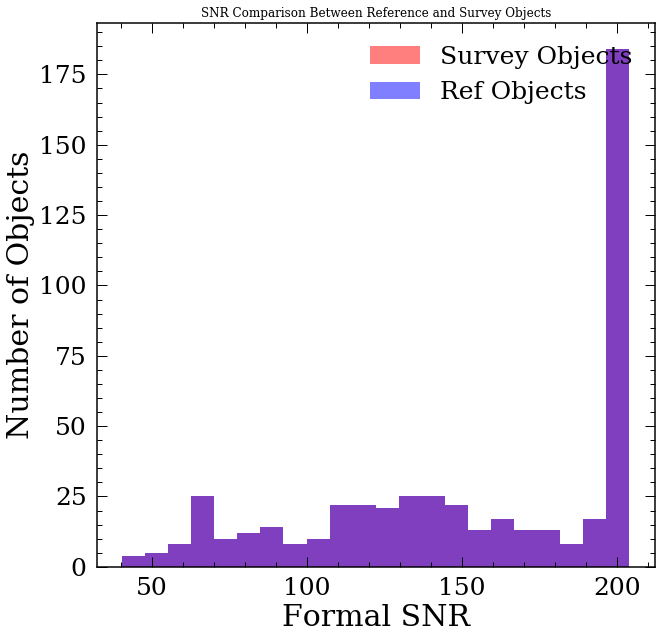

In [79]:
fig = ds.diagnostics_SNR()

Plotting every label against every other


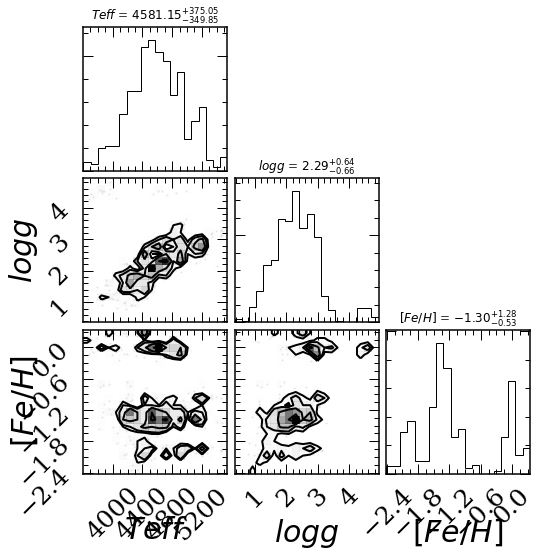

In [80]:
fig = ds.diagnostics_ref_labels()

In [81]:
from TheCannon import model
md = model.CannonModel(2, useErrors=False)
md.fit(ds)

<TheCannon.model.CannonModel object at 0x1cb037978> <TheCannon.dataset.Dataset object at 0x1c7d0a710>
Done training model. 


Diagnostic plot: leading coeffs and scatters across wavelength.


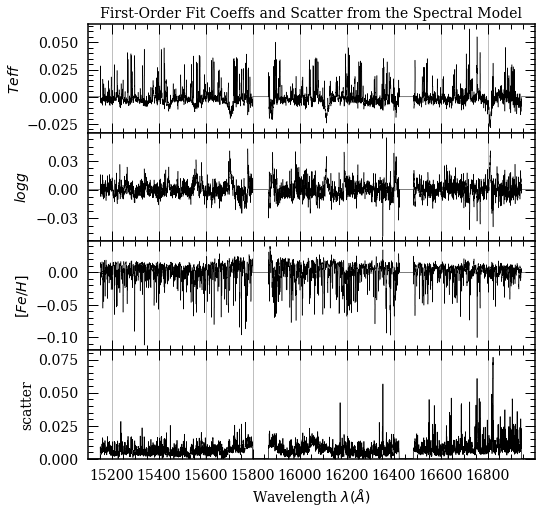

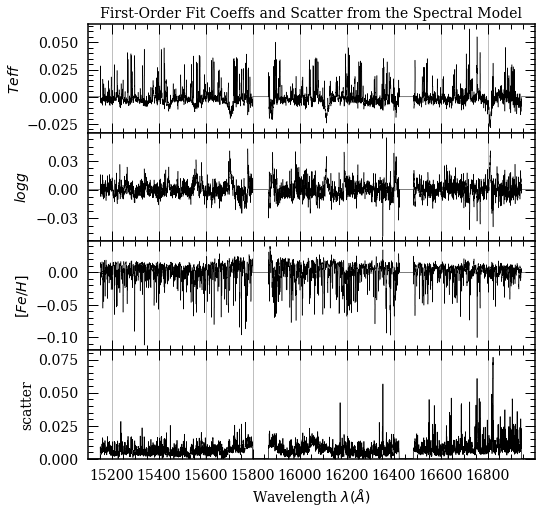

In [82]:
md.diagnostics_leading_coeffs(ds)



In [83]:
label_errs = md.infer_labels(ds)

Inferring Labels


In [84]:
test_labels = ds.test_label_vals

Reference label Teff
flagged 20 stars beyond 2-sig of ref labels
Saved list flagged_stars_0.txt
Reference label logg
flagged 21 stars beyond 2-sig of ref labels
Saved list flagged_stars_1.txt
Reference label [Fe/H]
flagged 9 stars beyond 2-sig of ref labels
Saved list flagged_stars_2.txt
Plotting every label against every other


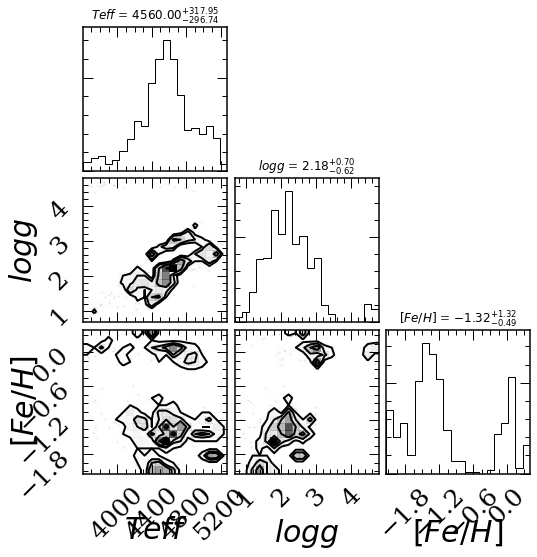

In [85]:
ds.diagnostics_test_step_flagstars()
ds.diagnostics_survey_labels()

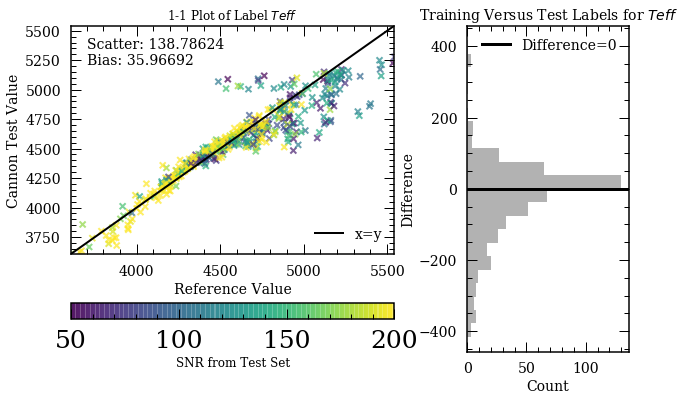

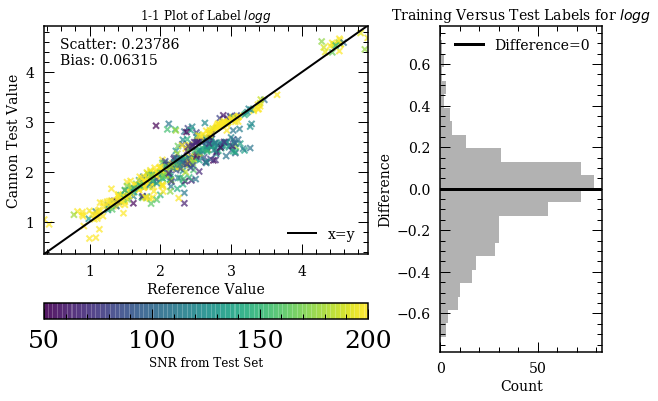

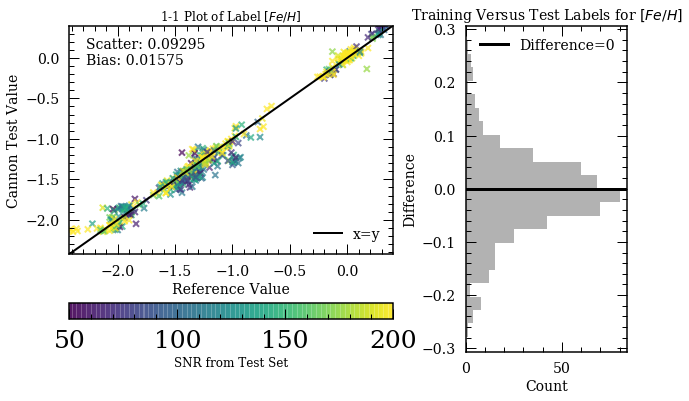

In [86]:
diagnostics_1to1(ds)